Perceptron Çalışması

Yunus Emre Ak

In [5]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# ?
%matplotlib inline

Using TensorFlow backend.


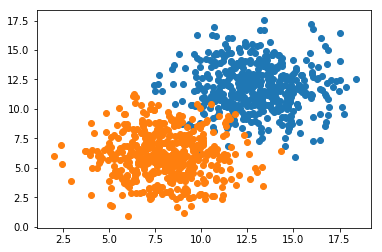

In [6]:
# Nokta sayısı
n = 500

# Rastgele verileriher derlemede aynı olmasını sağlama
np.random.seed(0)

# Input'ların oluşturulması
x_ust = np.array([
    np.random.normal(13, 2, n),
    np.random.normal(12, 2, n)
]).T
x_alt = np.array([
    np.random.normal(8, 2, n),
    np.random.normal(6, 2, n)
]).T
x = np.vstack((x_ust, x_alt))

# Output'ların oluşturulması
y = np.matrix(np.append(np.zeros(n), np.ones(n))).T

# Koordinat düzelminde çizilmesi
# [satır, sütun]
# :n - n'den önceki veriler
# n: - n'den sonraki veriler
plt.scatter(x[:n, 0], x[:n, 1])
plt.scatter(x[n:, 0], x[n:, 1])

In [7]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])

# x: input
# y: output
# verbose : Ek bilgileri gösterir
# epochs: İşlem sayısı
gecmis = model.fit(x=x, y=y, verbose=1, batch_size=50, epochs=500, shuffle='true')

Epoch 1/500
1000/1000 [==============================] - 0s 129us/step - loss: 1.4249 - acc: 0.5590
Epoch 2/500
1000/1000 [==============================] - 0s 16us/step - loss: 0.6261 - acc: 0.6060
Epoch 3/500
1000/1000 [==============================] - 0s 16us/step - loss: 0.4457 - acc: 0.8290
Epoch 4/500
1000/1000 [==============================] - 0s 15us/step - loss: 0.3838 - acc: 0.8950
Epoch 5/500
1000/1000 [==============================] - 0s 17us/step - loss: 0.3406 - acc: 0.9050
Epoch 6/500
1000/1000 [==============================] - 0s 16us/step - loss: 0.3077 - acc: 0.9270
Epoch 7/500
1000/1000 [==============================] - 0s 14us/step - loss: 0.2885 - acc: 0.9320
Epoch 8/500
1000/1000 [==============================] - 0s 16us/step - loss: 0.2610 - acc: 0.9390
Epoch 9/500
1000/1000 [==============================] - 0s 15us/step - loss: 0.2347 - acc: 0.9580
Epoch 10/500
1000/1000 [==============================] - 0s 14us/step - loss: 0.2190 - acc: 0.9630
Epoch 11

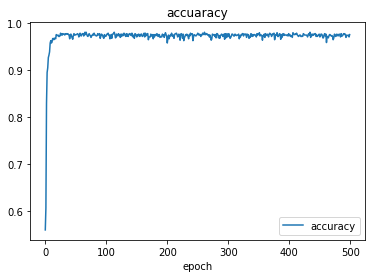

In [8]:
# Grafik çizdirme
plt.plot(gecmis.history['acc'])
plt.title('accuaracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

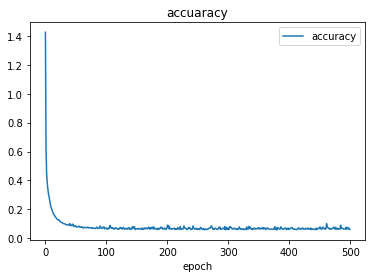

In [9]:
 # Grafik çizdirme
plt.plot(gecmis.history['loss'])
plt.title('accuaracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

In [10]:
def plat_decision_boundary(x, y, model):
    # x,y dağılımlarını bulma (0.5 br daha uzun olacak çizgi)
    x_span = np.linspace(min(x[:, 0]) - 0.25, max(x[:, 0]) + 0.25)
    y_span = np.linspace(min(x[:, 1]) - 0.25, max(x[:, 1]) + 0.25)
    
    # Her x'e karşılık bir y değerinin geldiği matriksi oluşturma
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    tablo = np.c_[xx_, yy_]
    
    ongoru_metodu = model.predict(tablo)
    z = ongoru_metodu.reshape(xx.shape)
    plt.contourf(xx, yy, z)
    

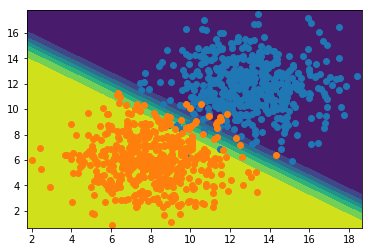

In [11]:
# Modeli ekrana çizdirme
plat_decision_boundary(x, y, model)
plt.scatter(x[:n, 0], x[:n, 1])
plt.scatter(x[n:, 0], x[n:, 1])